In this exercise we will learn how to use image analysis to identify and count seeds from an image collected with a regular mobile device camera.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.filters import threshold_otsu
from skimage.morphology import area_opening, disk, binary_closing
from skimage.measure import find_contours, label
from skimage.color import rgb2gray, label2rgb


In [3]:
# Read color image
image_rgb = mpimg.imread('../datasets/images/seeds.jpg')


In [4]:
# Convert image to grayscale
image_gray = rgb2gray(image_rgb)


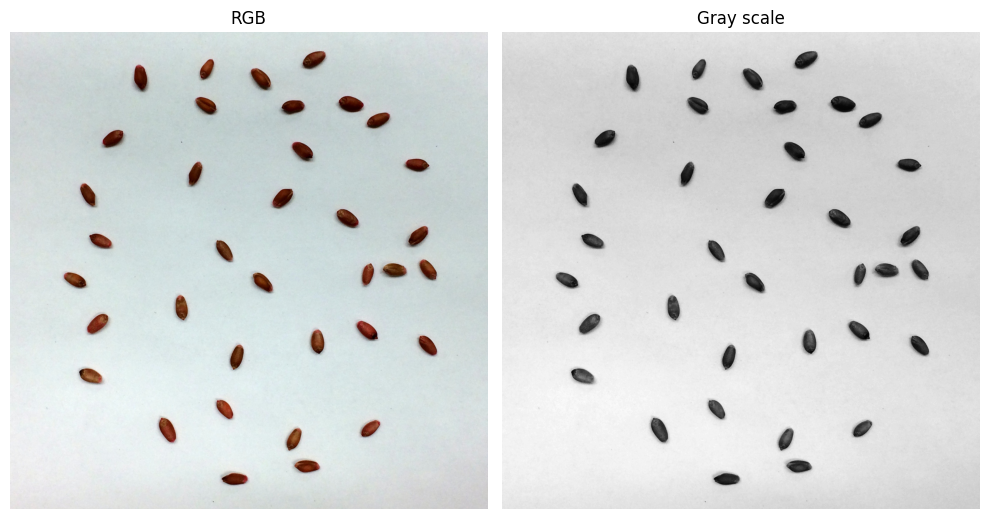

In [5]:
# Visualize rgb and grayscale images
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('RGB')
plt.tight_layout()

plt.subplot(1,2,2)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Gray scale')
plt.tight_layout()

plt.show()


In [6]:
# Segment seeds using a global automated threshold
global_thresh = threshold_otsu(image_gray)
image_binary = image_gray > global_thresh


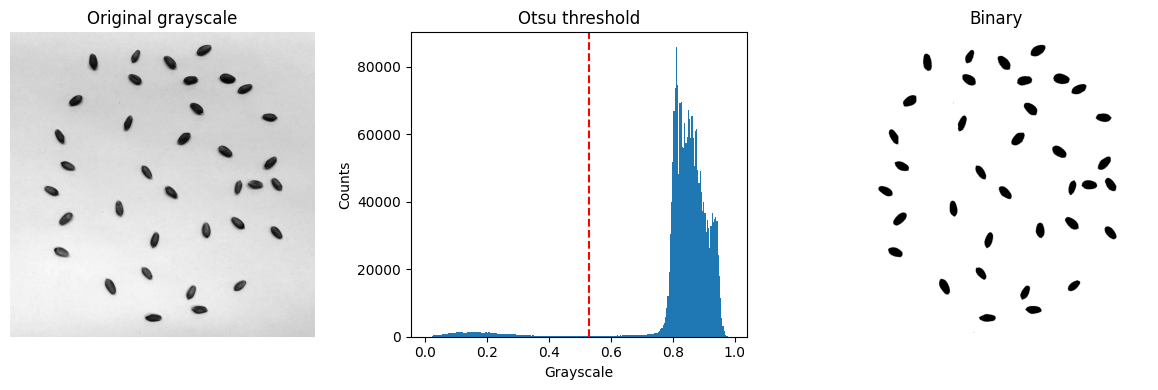

In [7]:
# Display classified seeds and grayscale threshold
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original grayscale')
plt.tight_layout()

plt.subplot(1,3,2)
plt.hist(image_gray.ravel(), bins=256)
plt.axvline(global_thresh, color='r', linestyle='--')
plt.title('Otsu threshold')
plt.xlabel('Grayscale')
plt.ylabel('Counts')

plt.subplot(1,3,3)
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.tight_layout()

plt.show()


In [8]:
# Invert image
image_binary = ~image_binary


In [9]:
# Remove small areas (remove noise)
image_binary = area_opening(image_binary, area_threshold=1000, connectivity=2)


In [10]:
# Closing (performs a dilation followed by an erosion. Connect small bright patches)
image_binary = binary_closing(image_binary, disk(5))

# Let's inspect the structuring element
print(disk(5))


[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


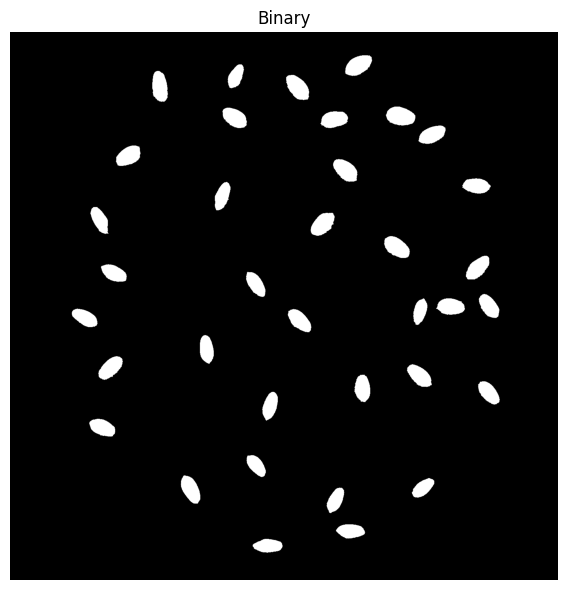

In [11]:
# Display inverted and denoised binary image
plt.figure(figsize=(6,6))

plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.tight_layout()

plt.show()


In [12]:
# Identify seed boundaries
contours = find_contours(image_binary, 0)

# Print number of seeds in image
print('Image contains',len(contours),'seeds')


Image contains 36 seeds


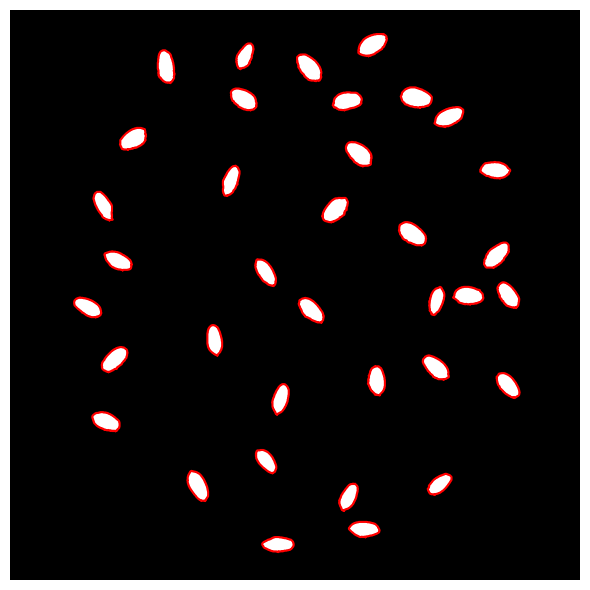

In [13]:
# Plot seed contours
plt.figure(figsize=(6,6))
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.tight_layout()

for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=1.5)
    

In [14]:
# Label image regions
label_image = label(image_binary)
image_label_overlay = label2rgb(label_image, image=image_rgb)


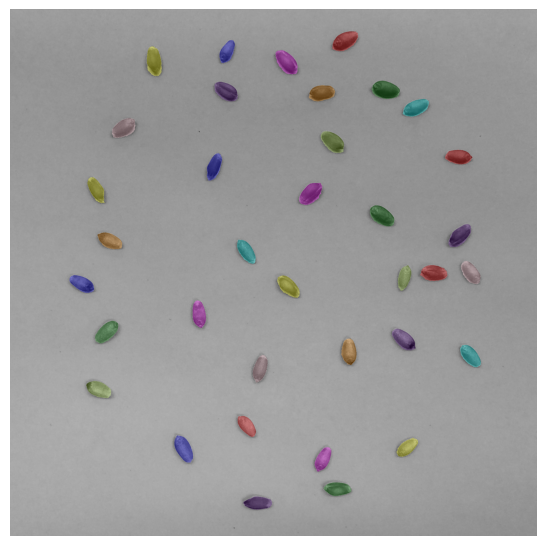

In [15]:
# Display image regions on top of original image
plt.figure(figsize=(6, 6))
plt.imshow(image_label_overlay)
plt.tight_layout()
plt.axis('off')
plt.show()


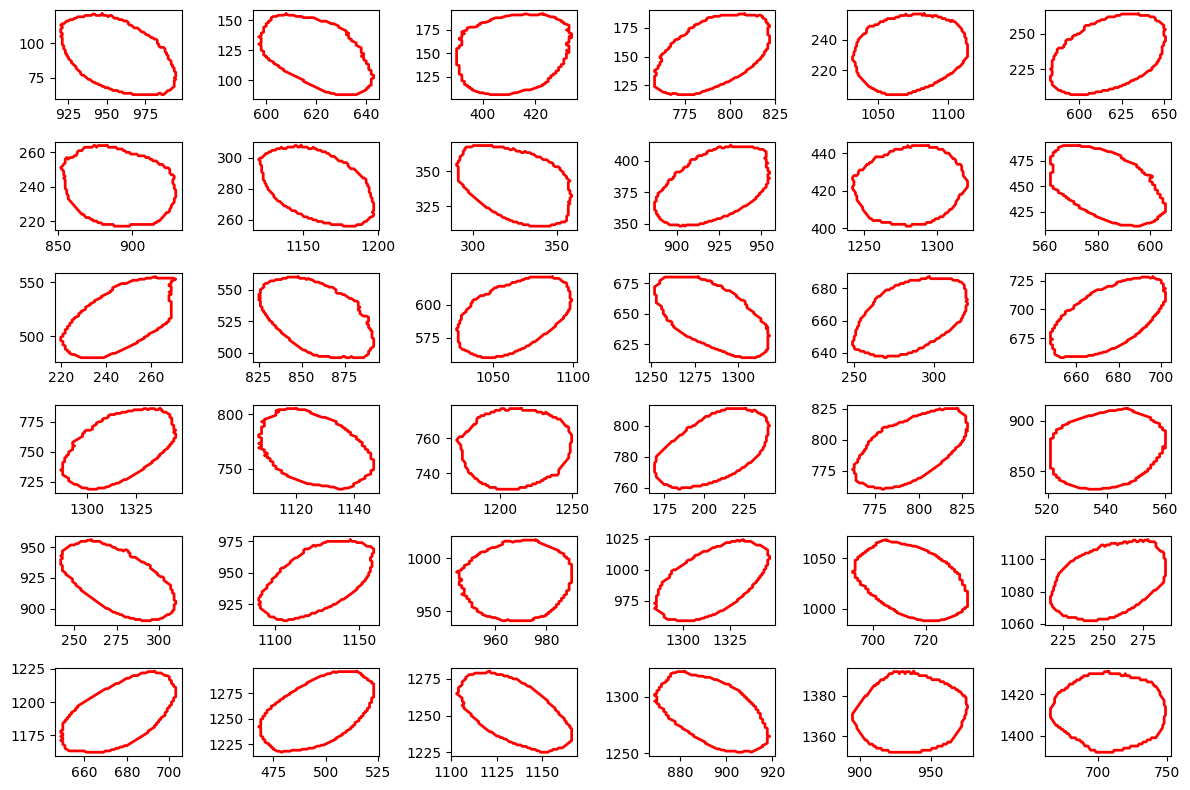

In [16]:
# Display contour for a single seed
plt.figure(figsize=(12, 8))

for seed in range(36):
    plt.subplot(6,6,seed+1)
    plt.plot(contours[seed][:, 1], contours[seed][:, 0], '-r', linewidth=2)
    plt.tight_layout()
plt.show()
